<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math as m

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [65]:
data_set = pd.read_csv('HH_data.csv', sep = ';')
print(f'Размерность таблицы: {data_set.shape[0]} строки и {data_set.shape[1]} столбцов')

Размерность таблицы: 44744 строки и 12 столбцов


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [66]:
display(data_set.head(5))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [67]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [68]:
data_set.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2-х словах и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [69]:
def education(EDU):
    if EDU[:1] == 'В':
        return 'Высшее'
    elif EDU[:1] == 'Н':
        return 'Неоконченное высшее'
    elif EDU[:19] == 'Среднее образование':
        return 'Среднее'
    else:
        return 'Среднее специальное'

data_set['Образование'] = data_set['Образование и ВУЗ'].apply(education)
data_set.drop('Образование и ВУЗ', axis = 1, inplace = True)

data_set['Образование'].describe()

count      44744
unique         4
top       Высшее
freq       33863
Name: Образование, dtype: object

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [70]:
def sex(s):
    return s[:1]

def age(a):
    a = a.split()
    return a[2]

data_set['Пол'] = data_set['Пол, возраст'].apply(sex)
data_set['Возраст'] = data_set['Пол, возраст']. apply(age)
data_set['Возраст'] = data_set['Возраст'].astype('int16')

data_set.drop('Пол, возраст', axis = 1, inplace = True)

data_set['Пол'].describe(include = 'object')

count     44744
unique        2
top           М
freq      36211
Name: Пол, dtype: object

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [71]:
def experience(x):
    try:
        x = x.split()
    except AttributeError:
        return np.nan
    else:
        if x[0] == 'Не':
            return np.nan
        elif x[3] == 'месяц' or x[3] == 'месяца' or x[3] == 'месяцев':
            return int(x[2])
        elif x[5] == 'месяц' or x[5] == 'месяца' or x[5] == 'месяцев':
            return int(x[2])*12 + int(x[4])
        else:
            return int(x[2])*12
    
data_set['Стаж (месяцев)'] = data_set['Опыт работы'].apply(experience)
data_set.drop('Опыт работы', axis = 1, inplace = True)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузке данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [72]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

def city(c):
    c = c.replace(',','')
    c = c.split()
    
    if c[0] == 'Москва' or c[0] == 'Санкт-Петербург':
        return c[0]
    elif c[0] in million_cities:
        return 'Город-миллионик'
    else:
        return 'Другое'

def removal(r):
    if 'не готов к переезду' in r or 'не готова к переезду' in r:
        return False
    else:
        return True

def trip(t):
    if 'командировкам' not in t:
        return False
    elif 'не готов к командировкам' in t or 'не готова к командировам' in t:
        return False
    else:
        return True

data_set['Город'] = data_set['Город, переезд, командировки'].apply(city)
data_set['Готовность к переезду'] = data_set['Город, переезд, командировки'].apply(removal)
data_set['Готовность к командировкам'] = data_set['Город, переезд, командировки'].apply(trip)

data_set.drop('Город, переезд, командировки', axis = 1, inplace = True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [73]:
data_set['Полная занятость'] = data_set['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
data_set['Частичная занятость'] = data_set['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
data_set['Проектная работа'] = data_set['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
data_set['Стажировка'] = data_set['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
data_set['Волонтёрство'] = data_set['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)

data_set['Полный день'] = data_set['График'].apply(lambda x: True if 'полный день' in x else False)
data_set['Сменный график'] = data_set['График'].apply(lambda x: True if 'сменный график' in x else False)
data_set['Гибкий график'] = data_set['График'].apply(lambda x: True if 'гибкий график' in x else False)
data_set['Удалённая работа'] = data_set['График'].apply(lambda x: True if 'удаленная работа' in x else False)
data_set['Вахтовый метод'] = data_set['График'].apply(lambda x: True if 'вахтовый метод' in x else False)

data_set.drop(['График','Занятость'], axis = 1, inplace = True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [74]:
ExchangeRates = pd.read_csv('ExchangeRates.csv', sep = ',')

ExchangeRates['date'] = pd.to_datetime(ExchangeRates['date'], dayfirst = True)
ExchangeRates['Курс'] = ExchangeRates['close'] / ExchangeRates['proportion']
ExchangeRates = ExchangeRates.rename(columns = {'currency' : 'Валюта', 'date' : 'Обновление резюме'})
ExchangeRates.drop(['per', 'time', 'vol', 'close', 'proportion'], axis = 1, inplace = True)

def date(d):
    d = d.split()
    return d[0]

def salary(s):
    s = s.split()
    return s[0]

def currency(c):
    c = c.split()
    
    if c[1] == 'руб.':
        return 'RUB'
    elif c[1] == 'бел.руб.':
        return 'BYN'
    elif c[1] == 'грн.':
        return 'UAH'
    elif c[1] == 'сум':
        return 'UZS'
    else:
        return c[1]

data_set['Обновление резюме'] = data_set['Обновление резюме'].apply(date)
data_set['Обновление резюме'] = pd.to_datetime(data_set['Обновление резюме'], dayfirst = True)

data_set['Зарплата'] = data_set['ЗП'].apply(salary)
data_set['Валюта'] = data_set['ЗП'].apply(currency)

data_set = data_set.merge(
    ExchangeRates,
    on = ['Обновление резюме', 'Валюта'],
    how = 'left'
)

data_set['Зарплата'] = data_set['Зарплата'].astype('float64')
value = {'Курс' : 1}
data_set = data_set.fillna(value)
data_set['Зарплатные ожидания (руб)'] = data_set['Зарплата'] * data_set['Курс']
data_set.drop(['ЗП', 'Зарплата', 'Валюта', 'Курс'], axis = 1, inplace = True)


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

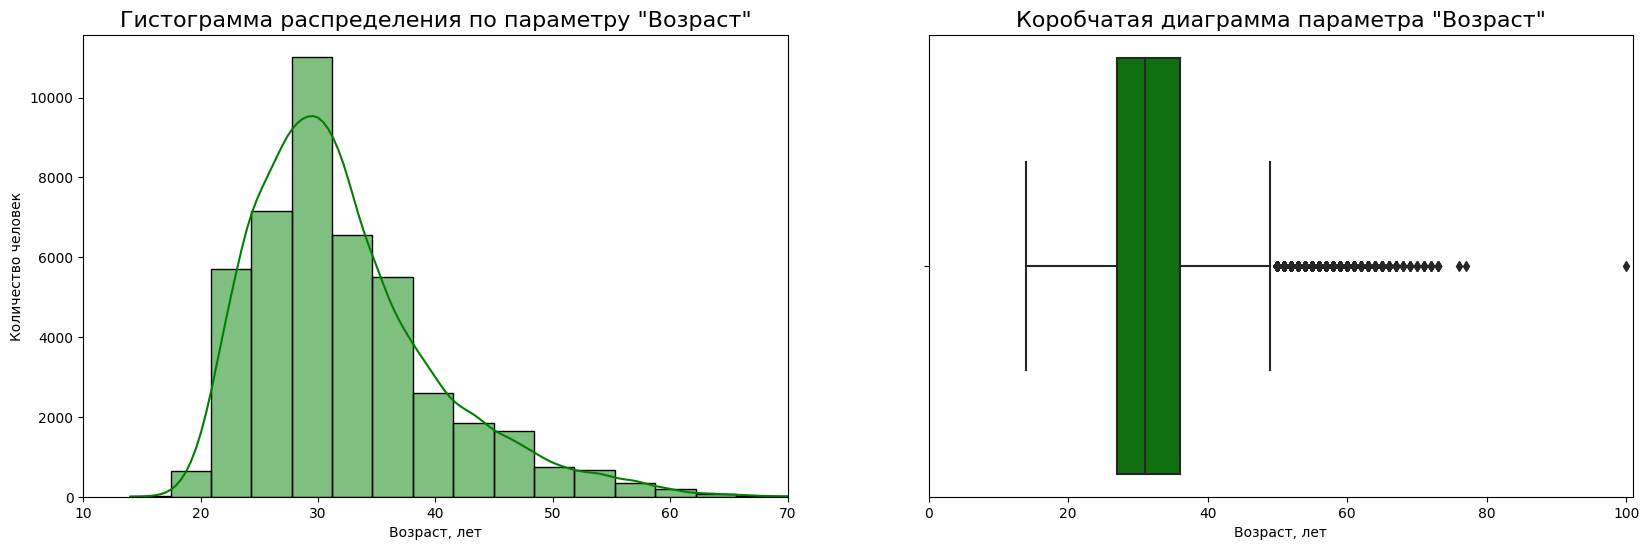

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

sns.histplot(
    data = data_set,
    x = 'Возраст',
    bins = 25,
    kde = True,
    ax = axes[0],
    color = 'green'
);
axes[0].set_title('Гистограмма распределения по параметру "Возраст"', fontsize = 16);
axes[0].set_xlabel('Возраст, лет');
axes[0].set_ylabel('Количество человек');
axes[0].set_xlim(10, 70); #подростки могут работать только с 14 лет

sns.boxplot(
    data = data_set,
    x = 'Возраст',
    orient = 'h',
    width = 0.9,
    ax = axes[1],
    color = 'green'
)
axes[1].set_title('Коробчатая диаграмма параметра "Возраст"', fontsize = 16);
axes[1].set_xlabel('Возраст, лет');
axes[1].set_xlim(0, 101);

> Проанализировав полученные данные, можно сделать слудующие выводы:
>* мода представленного распределения равна 30 годам;
>* возраст большинства соискателей находится в интервале от 25 до 35 лет. Это молодые энергичные люди уже обладающие неким багажом опыта работы и серьёзными профессиональными навыками; 
>* предельным значением данного признака является возраст в 100 лет. Наиболее вероятно, что данного значение является **выбросом**. Также к выбросам стоит отнести все значения более 80 лет, так как до этого значения ещё встречаются *великовозрастные специалисты* умудрённые опытом.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

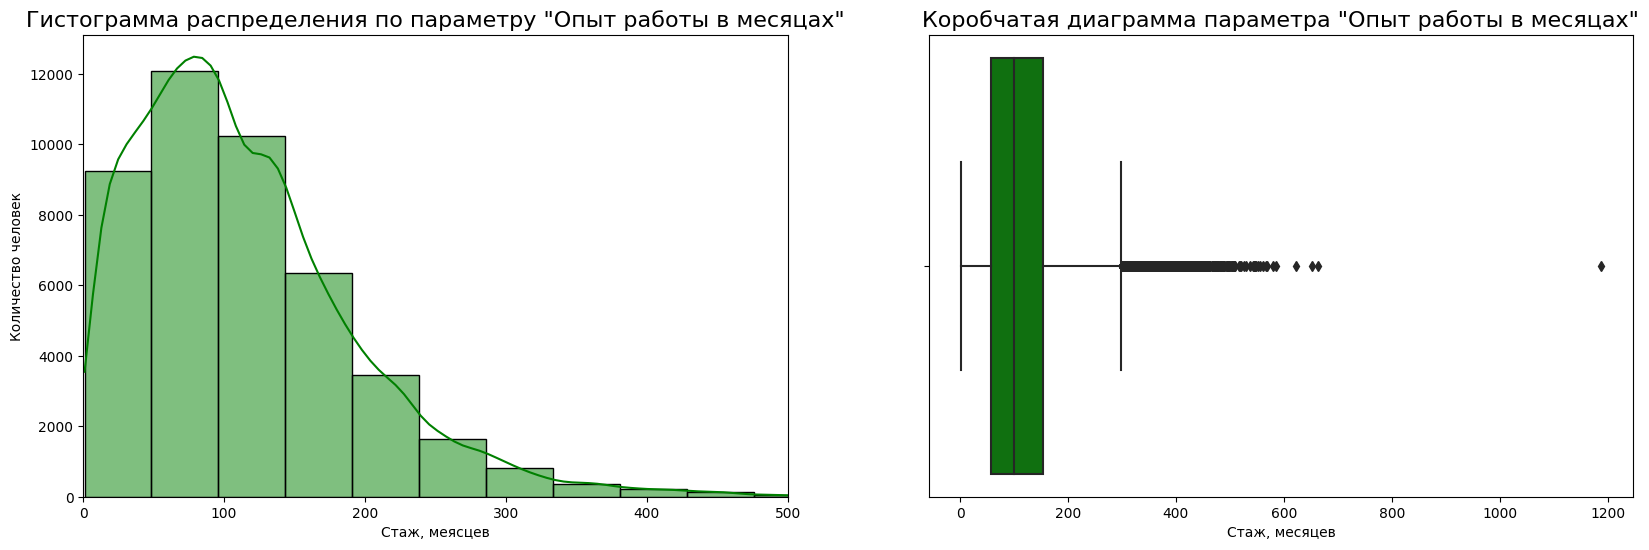

In [76]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

sns.histplot(
    data = data_set,
    x = 'Стаж (месяцев)',
    bins = 25,
    kde = True,
    ax = axes[0],
    color = 'green'
);
axes[0].set_title('Гистограмма распределения по параметру "Опыт работы в месяцах"', fontsize = 16);
axes[0].set_xlabel('Стаж, меясцев');
axes[0].set_ylabel('Количество человек');
axes[0].set_xlim(0, 500) #для наглядности отображения

sns.boxplot(
    data = data_set,
    x = 'Стаж (месяцев)',
    orient = 'h',
    width = 0.9,
    ax = axes[1],
    color = 'green'
)
axes[1].set_title('Коробчатая диаграмма параметра "Опыт работы в месяцах"', fontsize = 16);
axes[1].set_xlabel('Стаж, месяцев');

> Проанализировав полученные данные, можно сделать слудующие выводы:
>* мода представленного распределения равна 80 месяцам;
>* опыт работы большинства соискателей находится в интервале от 50 до 100 месяцев. Вероятнее всего это молодые люди, недавно закончившие ВУЗы, которые обрели некий трудовой опыт и навыки работы.
>* предельным значением данного признака является опыт работы в 1188 месяцев. Наиболее вероятно, что данного значение является **выбросом**. Также к выбросам стоит отнести все значения более 700 месяцев, так как я считаю проблематичным работать более 60 лет, но такие предположения требуют дополнительной проверки.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака заробной платы? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


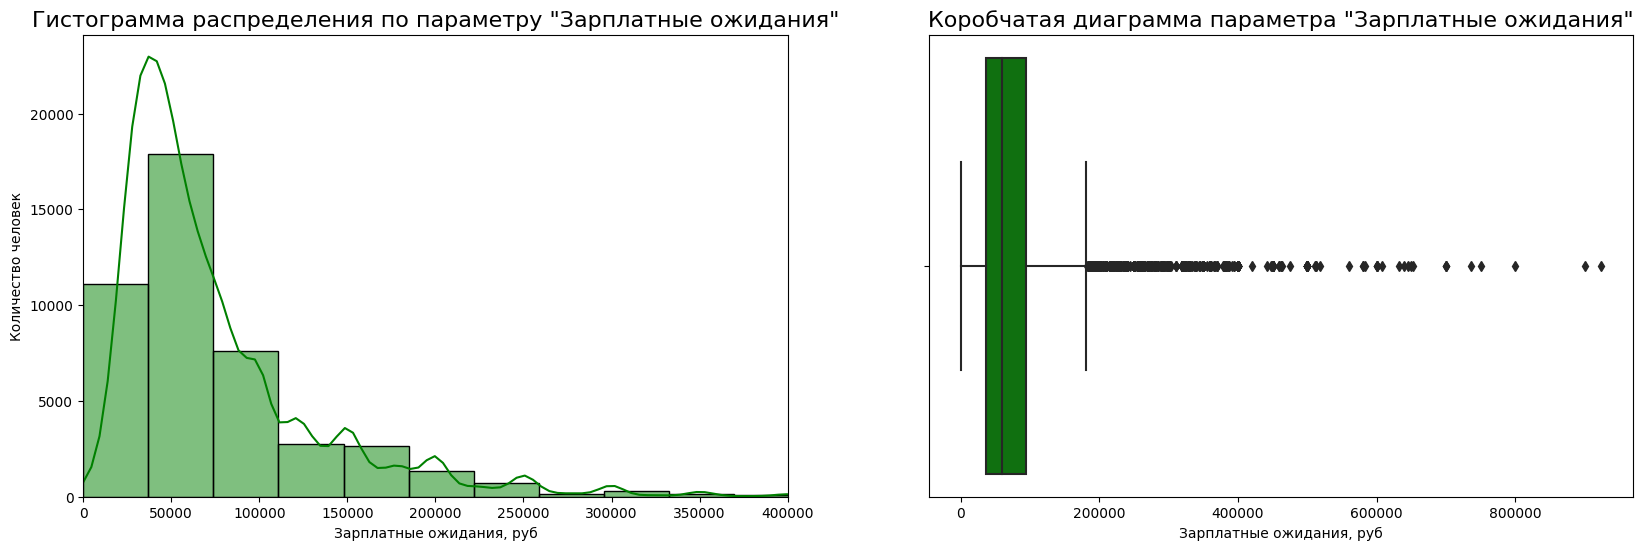

In [79]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

sns.histplot(
    data = data_set[data_set['Зарплатные ожидания (руб)'] < 1_000_000],
    x = 'Зарплатные ожидания (руб)',
    bins = 25,
    kde = True,
    ax = axes[0],
    color = 'green'
);
axes[0].set_title('Гистограмма распределения по параметру "Зарплатные ожидания"', fontsize = 16);
axes[0].set_xlabel('Зарплатные ожидания, руб');
axes[0].set_ylabel('Количество человек');
axes[0].set_xlim(0, 400_000) #для наглядности отображения

sns.boxplot(
    data = data_set[data_set['Зарплатные ожидания (руб)'] < 1_000_000],
    x = 'Зарплатные ожидания (руб)',
    orient = 'h',
    width = 0.9,
    ax = axes[1],
    color = 'green'
)
axes[1].set_title('Коробчатая диаграмма параметра "Зарплатные ожидания"', fontsize = 16);
axes[1].set_xlabel('Зарплатные ожидания, руб');

> Проанализировав полученные данные, можно сделать следующие выводы:
>* Предельные значения значения признака "Зарплатные ожидания" равняются 27.304.876 рублям. Данное значение определённо является **выбросом**;
>* Зарплатные ожидания большинства сооискателей составляют 50.000 рублей;

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

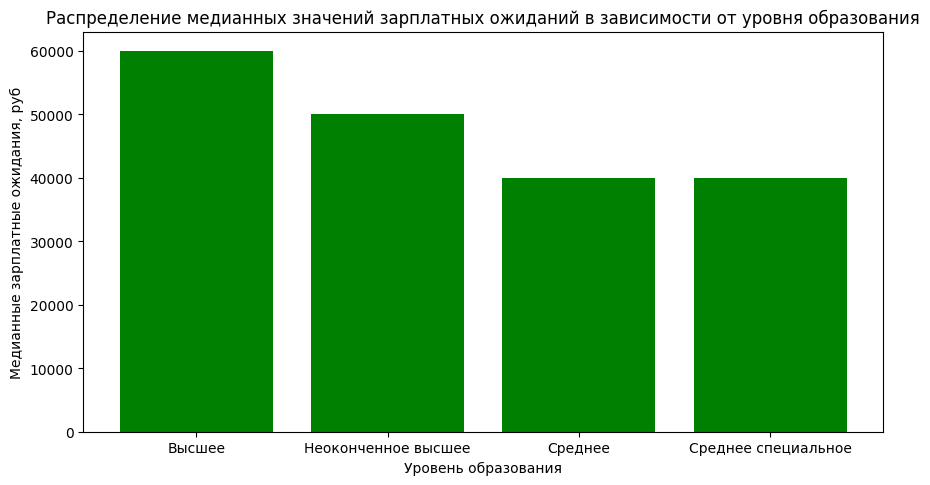

In [81]:
data_set_salary = data_set[data_set['Зарплатные ожидания (руб)'] < 1_000_000]
ude_salary = data_set_salary.groupby(by = 'Образование')['Зарплатные ожидания (руб)'].median()

fig = plt.figure(figsize = (8, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = ude_salary.index, height = ude_salary, color = 'green');
main_axes.set_xlabel('Уровень образования');
main_axes.set_ylabel('Медианные зарплатные ожидания, руб');
main_axes.set_title('Распределение медианных значений зарплатных ожиданий в зависимости от уровня образования');

> Проанализировав полученные данные, можно сделать следующие выводы:
>* Ожидаемо, что наибольшие зарплатные ожидания у соискателей с высшим образованием, а наименьшие у соискателей со школьным и средним специальным образованием;
>* Уровень образования напрямую влияет на уровень зарплатных ожиданий, так как человек, закончивший высшее учебное заведение, обладает более широким спектром специализированных знаний, а также обладает более высоким уровнем коммуникации и *изворотливости*. Перечисленные факты делают уровень образования соискателя одним из важнейших.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

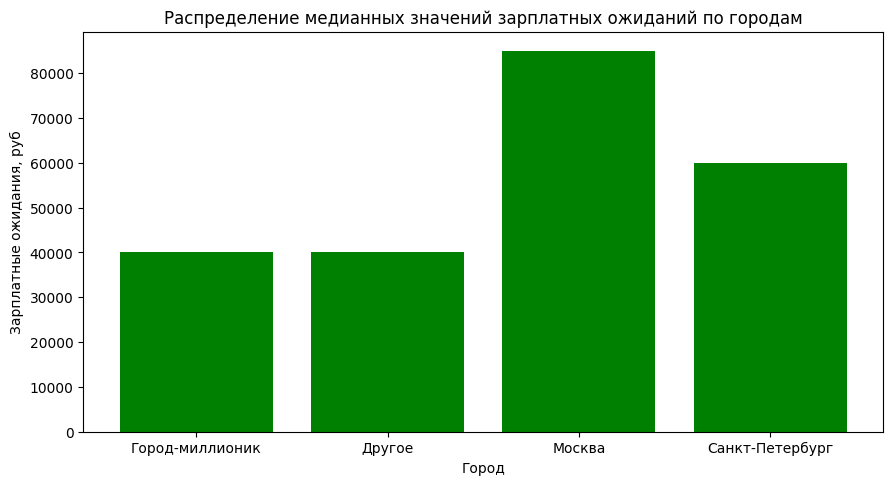

In [82]:
ude_salary = data_set_salary.groupby(by = 'Город')['Зарплатные ожидания (руб)'].median()

fig = plt.figure(figsize = (8, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = ude_salary.index, height = ude_salary, color = 'green');
main_axes.set_xlabel('Город');
main_axes.set_ylabel('Зарплатные ожидания, руб');
main_axes.set_title('Распределение медианных значений зарплатных ожиданий по городам');

>Проанализировов полученные данные, можно сделать следующие выводы:
>* Самые высокие медианные значения зарплатных ожидания наблюдаются в самых больших и *дорогих* городах нашей страны: Москва и Санкт-Петербург. Оставшиеся *региональные* города (даже региональные центры города-миллионики) отличаются меньшими зарплатными ожиданиями.
>* Город проживания является одним из важнейших при прогнозировании зарплаты соискателя.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

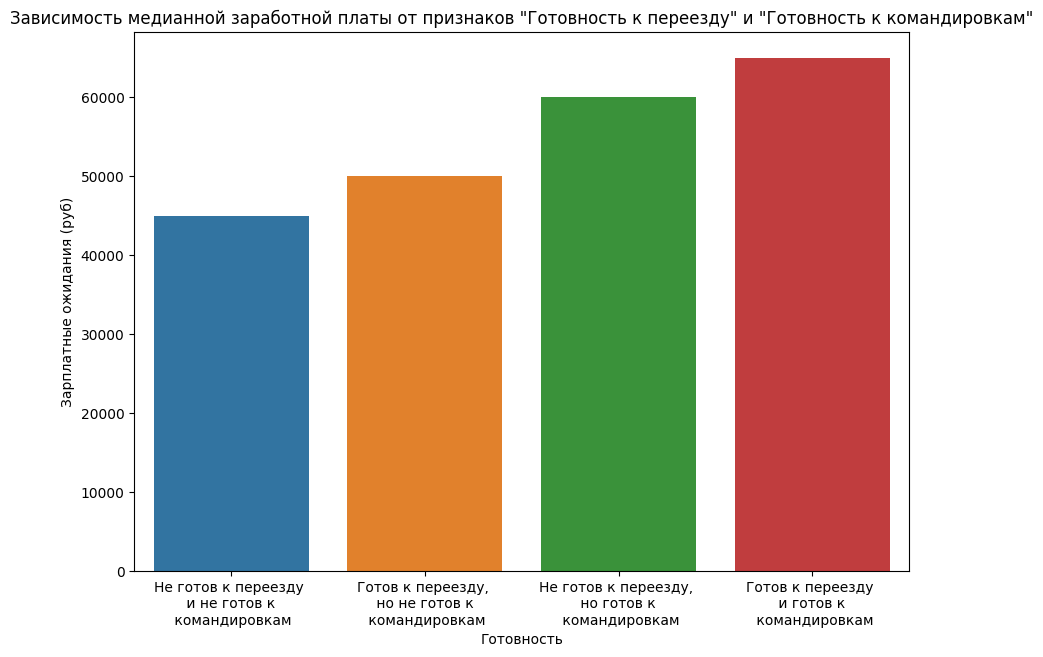

In [84]:
ready_data = data_set_salary.groupby(by = ['Готовность к командировкам', 'Готовность к переезду'], as_index = False)['Зарплатные ожидания (руб)'].median()

def name(salary):
    if salary == 45000:
        return 'Не готов к переезду \n и не готов к \n командировкам'
    elif salary == 60000:
        return 'Не готов к переезду, \n но готов к \n командировкам'
    elif salary == 50000:
        return 'Готов к переезду, \n но не готов к \n командировкам'
    else:
        return 'Готов к переезду \n и готов к \n командировкам'

ready_data['Готовность'] = ready_data['Зарплатные ожидания (руб)'].apply(name)
ready_data.drop(['Готовность к переезду', 'Готовность к командировкам'], axis = 1, inplace = True)

fig = plt.figure(figsize = (10, 7))

barplot = sns.barplot(
    data = ready_data,
    x = 'Готовность',
    y = 'Зарплатные ожидания (руб)'
)
barplot.set_title('Зависимость медианной заработной платы от признаков "Готовность к переезду" и "Готовность к командировкам"');

>Проанализировав полученные данные, можно сделать следующие выводы:
>* наибольшие зарплатные ожидания у соискателей, которые готовы к переезду и коммандировкам;
>* наименьшие зароботные ожидания у соискателей, которые привязаны к одному месту жительства;
>* зарплатные ожидания у соискателей, которые готовы к переезду, но не готовые к командировкам больше, чем у соискателей, привязанных к одному месту жительства, но меньше, чем у соискателей, которые не готовы к переезду, но готовы к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

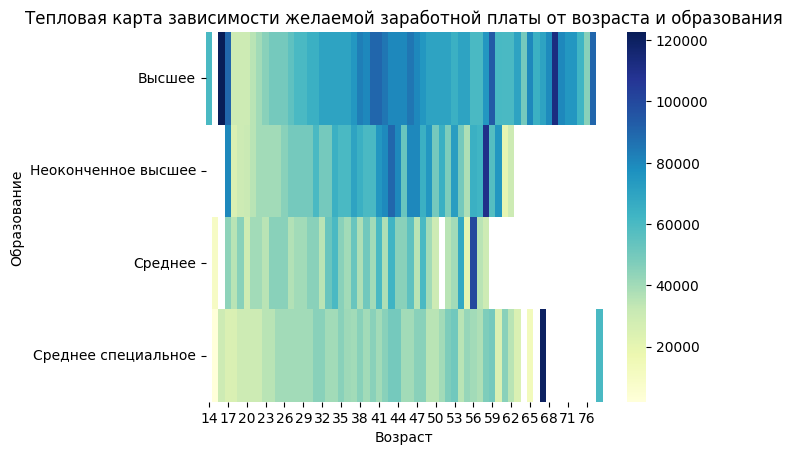

In [85]:
pivot_data = data_set_salary.groupby(by =['Образование', 'Возраст'], as_index = False)['Зарплатные ожидания (руб)'].median()

pivot = pivot_data.pivot_table(
    values = 'Зарплатные ожидания (руб)',
    columns = 'Возраст',
    index = 'Образование'
)
pivot.columns = pivot.columns.astype('string')

heatmap = sns.heatmap(data = pivot, cmap = 'YlGnBu')
heatmap.set_title('Тепловая карта зависимости желаемой заработной платы от возраста и образования');

>Проанализировав полученные данные, можно сделать следующие выводы:
>* самый быстрый прирост заработной платы наблюдается у соискателей с оконченным высшим образованием;
>* следующими по скорости прироста зароботной платы, после соискателей с высшим образованием, идут соискатели с неоконченным высшим образованием;
>* соискателей с средним образованием ждёт прирост заработной платы больше, чем соискателей с средним специальным образованием, но меньше, чем соискателей с неоконченным высшим образованием;
>* самый медленный прирост зароботной платы наблюдается у соискателей с средним специальным образованием.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

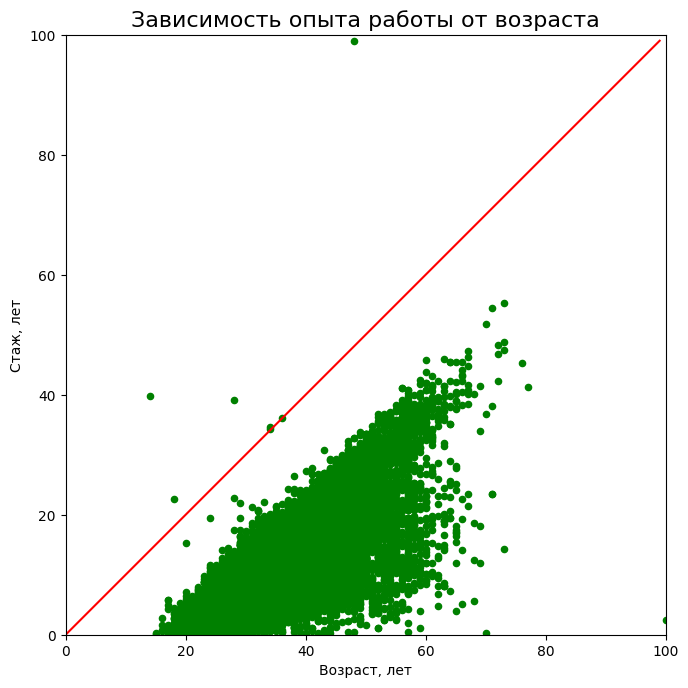

In [86]:
data_set['Стаж (лет)'] = data_set['Стаж (месяцев)'] / 12

fig = plt.figure(figsize = (6, 6))
axes = fig.add_axes([0, 0, 1, 1])

axes.scatter(
    x = data_set['Возраст'],
    y = data_set['Стаж (лет)'],
    s = 20,
    marker = 'o',
    c = 'green'
);
axes.set_title('Зависимость опыта работы от возраста', fontsize = 16)
axes.set_xlabel('Возраст, лет')
axes.set_ylabel('Стаж, лет')
axes.set_xlim(0, 100)
axes.set_ylim(0, 100)

x = np.arange(100)
plt.plot(x, x, color='red');

data_set.drop('Стаж (лет)', axis = 1, inplace = True)


>Проанализировав полученные данные, можно сделать слудующие выводы:
>* в данных, характеризующих стаж работы соискателей в годах, содержатся выбросы в количестве 7 штук, так как в данных случаях стаж работы либо соответствует, либо больше возраста соискателей.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


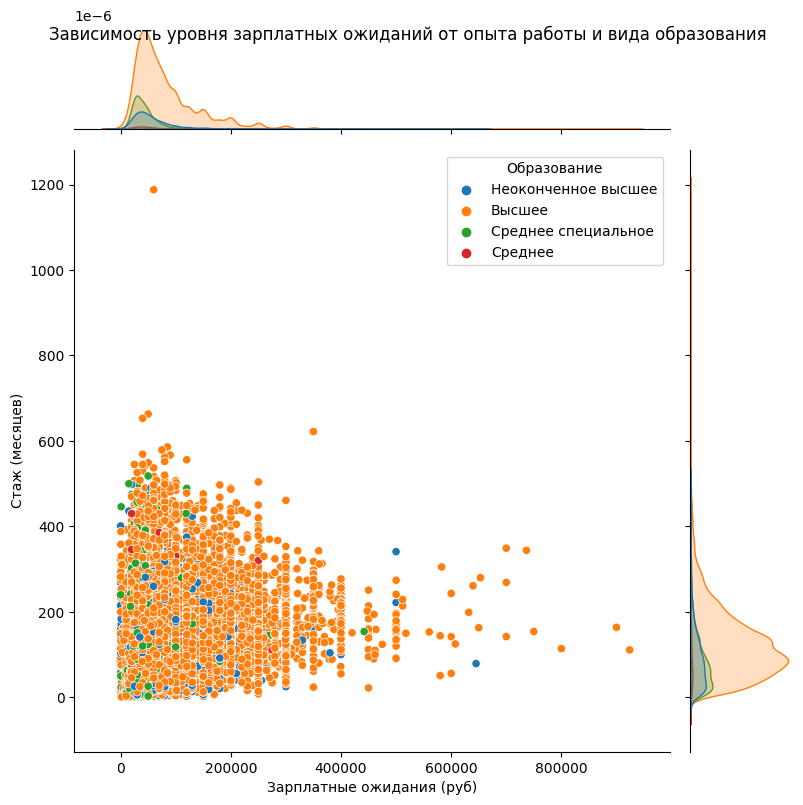

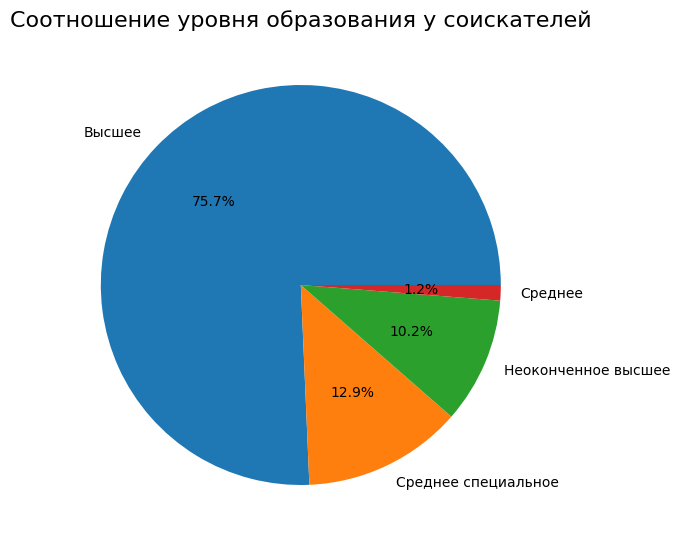

In [87]:
jointplot = sns.jointplot(
    data = data_set[data_set['Зарплатные ожидания (руб)'] < 1_000_000],
    x = 'Зарплатные ожидания (руб)',
    y = 'Стаж (месяцев)',
    hue = 'Образование',
    height = 8
)
jointplot.fig.suptitle('Зависимость уровня зарплатных ожиданий от опыта работы и вида образования');

fig = plt.figure(figsize = (5,5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    data_set['Образование'].value_counts(),
    labels = data_set['Образование'].value_counts().index,
    autopct ='%.1f%%'
);
plt.style.use('default')
axes.set_title('Соотношение уровня образования у соискателей', fontsize = 16);

>* В обывательской среде существует мнение, что уровень заработной платы коррелируется с уровнем образования и накопленным опытом работы. На представленном графике "Зависимость уровня зарплатных ожиданий от опыта и вида образования" видно, что гигантские зарплатные ожидания большинства соискателей не имеют под собой никаких оснований.
>* На графике "Соотношение уровня образования у соискателей" видно, что сложнее всего найти работу соискателям с высшим образованием. Количетсво соискателей с высшим образованием составляет 3/4 от всех представленных. Данный факт говрит о том, что соискателям с высшим образованием необходимо демонтрировать большее количество своих достоинств, а так же более качественно заполнять резюме. Данную инфромацию можно реализовать, как систему подсказок соискателю о более ответсвенном и качественном заполнении резюме и демонстрации больших своих навыков.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [88]:
dupl_columns = list(data_set.columns)

mask = data_set.duplicated(subset = dupl_columns)
data_set_duplicates = data_set[mask]
print(f'Число нйденных дубликатов: {data_set_duplicates.shape[0]}')

data_set_dedupped = data_set.drop_duplicates(subset = dupl_columns)

Число нйденных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [89]:
cols_null_sum = data_set_dedupped.isnull().sum()
cols_with_null = cols_null_sum[cols_null_sum > 0].sort_values(ascending = False)
print(cols_with_null)

Стаж (месяцев)                     168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [90]:
values = {'Стаж (месяцев)' : data_set_dedupped['Стаж (месяцев)'].median()}
fill_data = data_set_dedupped.fillna(values)

drop_data = fill_data.dropna(how = 'any', axis = 0)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [92]:
print(drop_data[(drop_data['Зарплатные ожидания (руб)'] < 1_000) | (drop_data['Зарплатные ожидания (руб)'] > 1_000_000)].shape[0])

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь